# Clarification of the Frequency Vector Format from FFT

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import cmath
import pandas as pd
import time, csv, os, requests

j = complex(0,1)

Running Python: 3.8.17
Running Sympy: 1.12rc1


## Create some data and perform FFT

In [2]:
fs = 100               # sampling frequency
f0 = 10
Tf = 10

t = np.arange(0,(Tf-1/fs),1/fs)
s = np.cos(2*np.pi*f0*t)
n = len(s)
f = np.arange(0,n,1)*fs/n
S = fft(s)/n

## Rearrange the output to more standard form

In [3]:
f_plot = fftshift(f)
S_plot = fftshift(S)

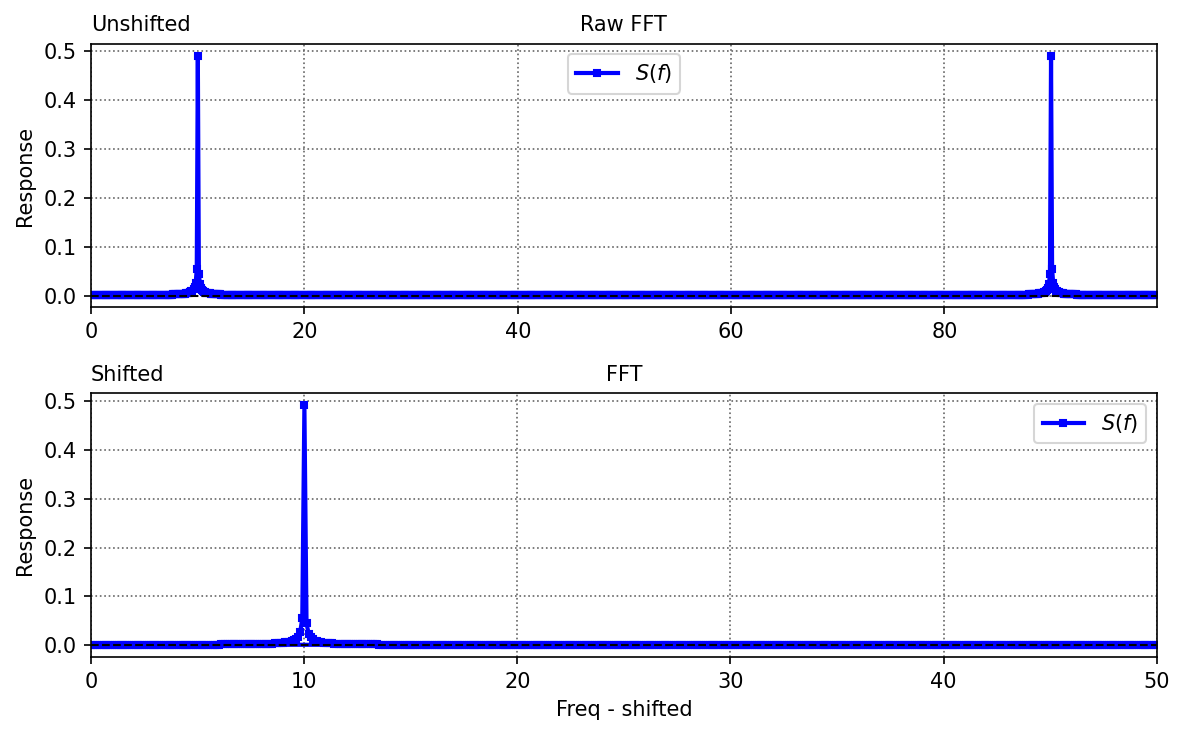

In [4]:
#Plot and compare both

fig, ax = plt.subplots(2,1, figsize=(8,5), dpi=150)
ax[0].plot(f,abs(S),'bs-',ms=3,label='$S(f)$')
ax[0].set_ylabel('Response')
ax[0].set_title('Unshifted',loc='left')
ax[1].set_xlabel('Freq - unshifted')
ax[0].legend()
ax[0].set_title('Raw FFT')

ax[1].plot(f_plot,abs(S_plot),'bs-',ms=3,label='$S(f)$')
ax[1].set_ylabel('Response')
ax[1].set_xlabel('Freq - shifted')
ax[1].set_title('Shifted',loc='left')
ax[1].legend()
ax[1].set_title('FFT')
ax[1].set_xlim([0, fs/2])

nicegrid(ax[0])
nicegrid(ax[1])

plt.show()

## Second Example

In [5]:
fs = 10; # samping freq
f = 2
Tf = 1

t = np.linspace(0,Tf-1/fs,Tf*fs)
x = np.sin(2*np.pi*f*t)    # signal
N = len(t)    # data pts

K = np.arange(N)    # index list
K_plot = np.linspace(-N//2,N//2-1,N)
F = K*fs/N
F_plot = K_plot*fs/N

WN = np.exp(-j*(2*np.pi/N))
W = WN**K  # for DFT

S = fft(x)
S_plot = fftshift(S)

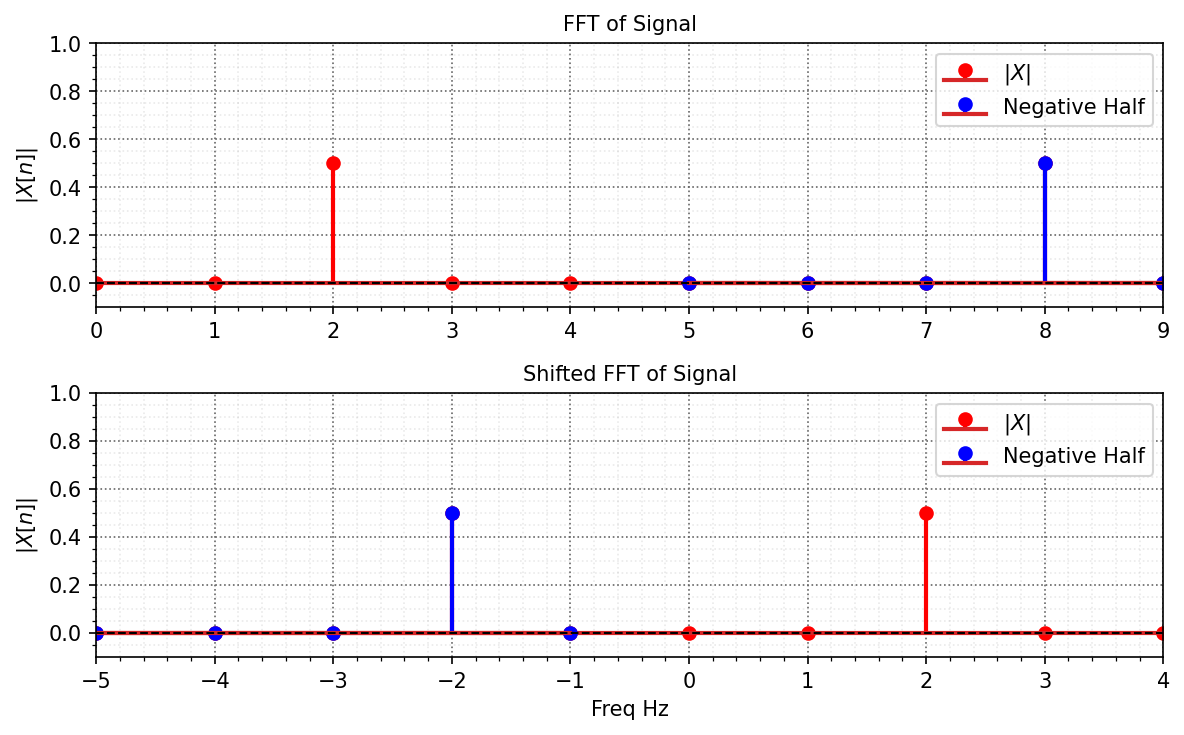

In [6]:
fig, ax = plt.subplots(2,1, figsize=(8,5), dpi=150)
ax[0].stem(F,abs(S)/N,'r-',label='$|X|$')
ax[0].stem(F[N//2:N],abs(S[N//2:N])/N,'b-',label="Negative Half")

ax[1].stem(F_plot,abs(S_plot)/N,'r-',label='$|X|$')
ax[1].stem(F_plot[0:N//2],abs(S_plot[0:N//2])/N,'b-',label="Negative Half")

ax[0].set_title('FFT of Signal')
ax[1].set_title('Shifted FFT of Signal')
ax[0].set_ylabel('$|X[n]|$')
ax[0].set_ylim(-0.1,1)
ax[1].set_ylim(-0.1,1)
ax[1].set_xlabel('Freq Hz')
ax[1].set_ylabel('$|X[n]|$')
nicegrid(ax[0])
nicegrid(ax)
ax[0].legend()
ax[1].legend()
fig.savefig("./figs/Xshift.png", dpi=300)